In [1]:
from uncertainties.umath import * # sin(), etc.
from uncertainties import ufloat
from uncertainties import unumpy, umath
import math
import math
from autograd import hessian
import autograd.numpy as np
import glob
from matplotlib import pyplot as plt

In [7]:
import os
result_files = []
failed_files = []
ver='v1.0'
for i in range(1,101):
    result_file = f"/shared/scratch/pc24403/single_bias/{ver}/fit_result_{i}.txt"
    if os.path.exists(result_file):
        with open(result_file) as f:
            content = f.read()    
            result_files.append(result_file)
    else:
        failed_files.append(i) 

print(f"Found {len(result_files)} valid results")

Found 100 valid results


In [3]:
with open('/shared/scratch/pc24403/sim_fit/failed_file','w') as f:
    for i in failed_files:
        f.write(f"{i}\n")

In [11]:

foundCKM = False
idx_CKM = 0
cov_string = ""
param_string = ""
log_strings = []
xp = []
xm = []
yp = []
ym = []
xxi = []
yxi = []

for result_file in result_files:

    idx = 0
    idxs = []
    x = []
    dx = []
    cov = []
    edm = 0
    with open(result_file) as f:
        for l in f:
            if "Means" in l:
                a = l.split()
                values = [float(a[i].rstrip(',')) for i in range(1,5)]
                x = values
            if "Errors" in l:
                a = l.split()
                values = [float(a[i].rstrip(',')) for i in range(1,5)]
                dx = values



    xp.append(ufloat(x[0], dx[0]))
    yp.append(ufloat(x[1], dx[1]))
    xm.append(ufloat(x[2], dx[2]))
    ym.append(ufloat(x[3], dx[3]))

In [12]:
x_exp = [-0.0897, -0.0110, 0.0586, 0.0688, -0.0549, 0.0070]
#x_exp = [0.0050, -0.0000, -0.0037, -0.0034, -0.0000, 0.0000]
xp_pull = []
yp_pull = []
xm_pull = []
ym_pull = []
xxi_pull = []
yxi_pull = []

for i in range(len(xp)):
    xp_pull.append((xp[i].n-x_exp[0])/xp[i].s)
    yp_pull.append((yp[i].n-x_exp[1])/yp[i].s)
    xm_pull.append((xm[i].n-x_exp[2])/xm[i].s)
    ym_pull.append((ym[i].n-x_exp[3])/ym[i].s)


#Make it as dictionary
pulls = {
    "xPlus": xp_pull,
    "yPlus": yp_pull,
    "xMinus": xm_pull,
    "yMinus": ym_pull,
}


x_exp = [-0.0897, -0.0110, 0.0586, 0.0688, -0.0549, 0.0070]
xp_mean = []
yp_mean = []
xm_mean = []
ym_mean = []

for i in range(len(xp)):
    xp_mean.append((xp[i].n))
    yp_mean.append((yp[i].n))
    xm_mean.append((xm[i].n))
    ym_mean.append((ym[i].n))


#Make it as dictionary
means = {
    "xPlus": xp_mean,
    "yPlus": yp_mean,
    "xMinus": xm_mean,
    "yMinus": ym_mean,
}


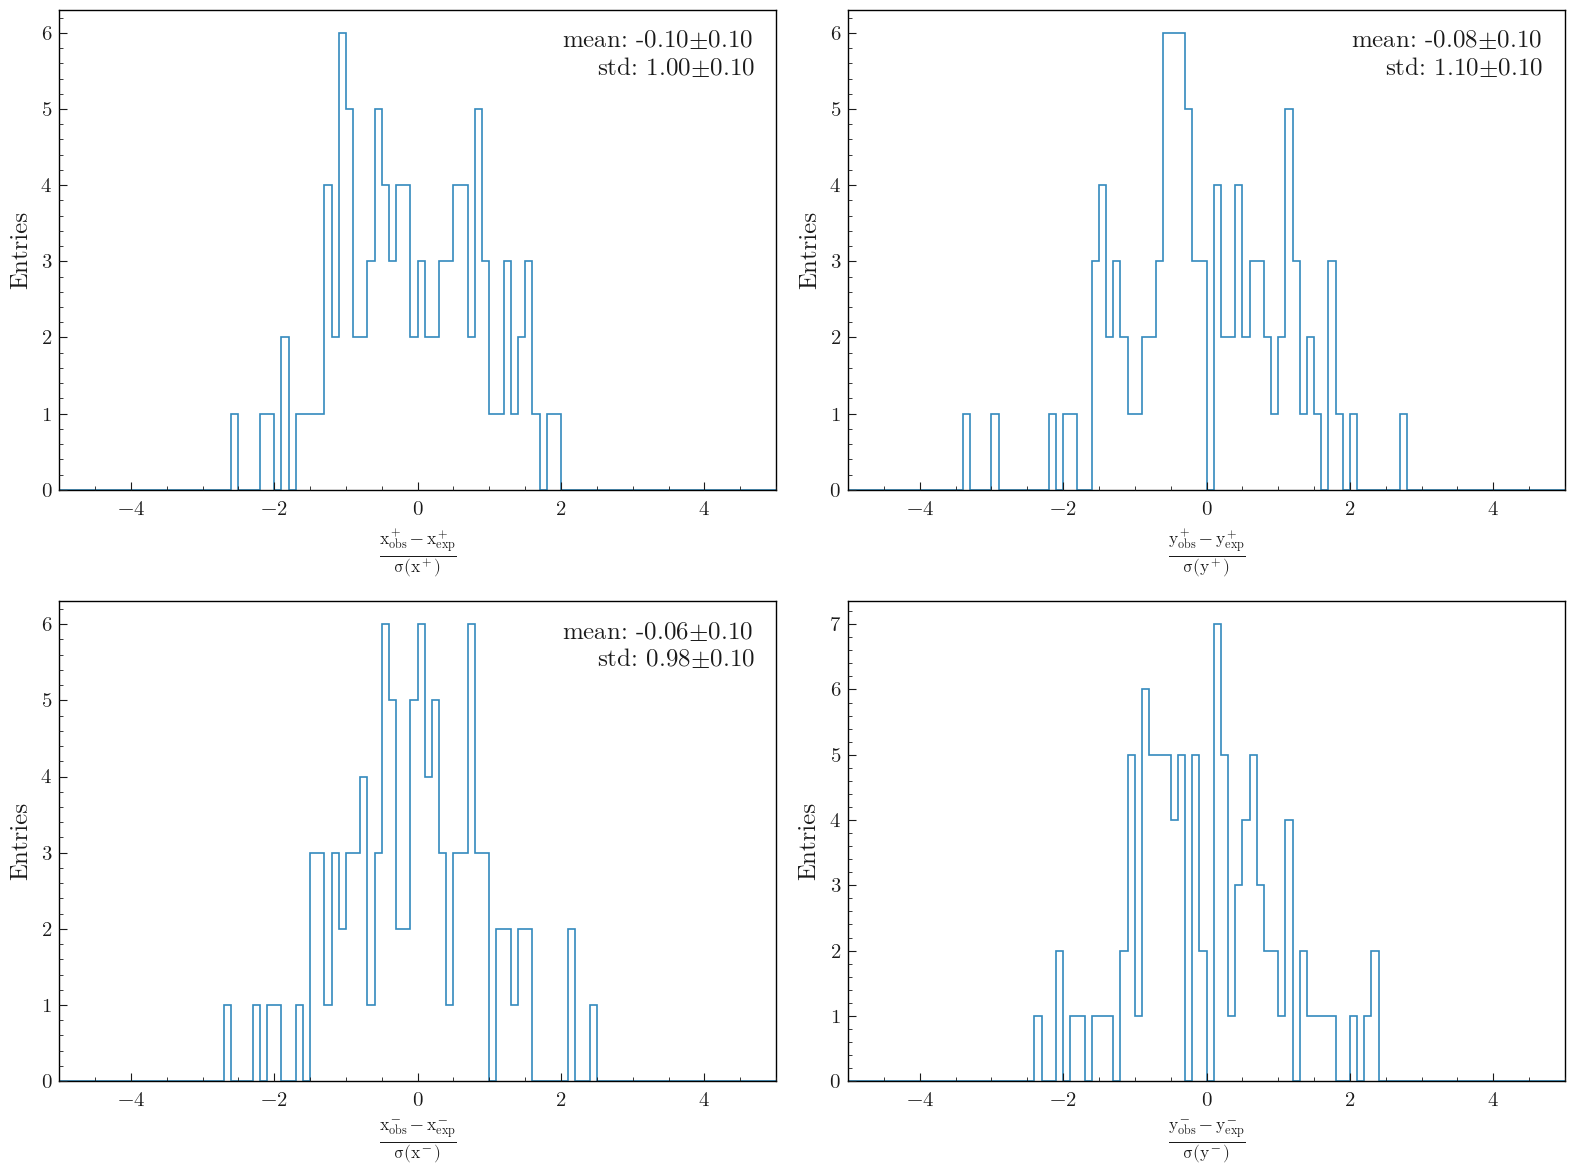

In [13]:
from plothist import make_hist, plot_hist, add_text, plot_error_hist

x_range = (-5, 5)

def pull_name(var='x^+'):
    return r'$ \frac{{ {var}_{{obs}} - {var}_{{exp}}}}{{ \sigma({var}) }}$'.format(var=var)
                                             
h1 = make_hist(xp_pull, bins=100, range=x_range)
h2 = make_hist(yp_pull, bins=100, range=x_range)
h3 = make_hist(xm_pull, bins=100, range=x_range)
h4 = make_hist(ym_pull, bins=100, range=x_range)



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8*2, 6*2))

plot_hist(h1, ax=ax1, histtype="step", linewidth=1.2, label='$x^+$')
ax1.set_xlabel(pull_name('x^+'))
ax1.set_ylabel("Entries")
ax1.set_xlim(x_range)
add_text(f"mean: {np.mean(xp_pull):.2f}$\pm${np.sqrt(1/len(xp_pull)):.2f} \nstd: {np.std(xp_pull):.2f}$\pm${np.sqrt(1/len(xp_pull)):.2f}", x='right_in', y='top_in', ax=ax1, fontsize=18)
plot_hist(h2, ax=ax2, histtype="step", linewidth=1.2, label='$y^+$')
ax2.set_xlabel(pull_name('y^+'))
ax2.set_ylabel("Entries")
ax2.set_xlim(x_range)
add_text(f"mean: {np.mean(yp_pull):.2f}$\pm${np.sqrt(1/len(yp_pull)):.2f} \nstd: {np.std(yp_pull):.2f}$\pm${np.sqrt(1/len(yp_pull)):.2f}", x='right_in', y='top_in', ax=ax2, fontsize=18)
plot_hist(h3, ax=ax3, histtype="step", linewidth=1.2, label='$x^-$')
ax3.set_xlabel(pull_name('x^-'))
ax3.set_ylabel("Entries")
ax3.set_xlim(x_range)
add_text(f"mean: {np.mean(xm_pull):.2f}$\pm${np.sqrt(1/len(xm_pull)):.2f} \nstd: {np.std(xm_pull):.2f}$\pm${np.sqrt(1/len(xm_pull)):.2f}", x='right_in', y='top_in', ax=ax3, fontsize=18)
plot_hist(h4, ax=ax4, histtype="step", linewidth=1.2, label='$y^-$')
ax4.set_xlabel(pull_name('y^-'))
ax4.set_ylabel("Entries")
ax4.set_xlim(x_range)
fig.tight_layout()


fig.savefig(f"/shared/scratch/pc24403/sim_fit/ana/pulls/{ver}.png")


In [15]:
xp_res = []
yp_res = []
xm_res = []
ym_res = []


for i in range(len(xp)):
    xp_res.append((xp[i].n-x_exp[0]))
    yp_res.append((yp[i].n-x_exp[1]))
    xm_res.append((xm[i].n-x_exp[2]))
    ym_res.append((ym[i].n-x_exp[3]))

#Make it as dictionary
res = {
    "xPlus": xp_res,
    "yPlus": yp_res,
    "xMinus": xm_res,
    "yMinus": ym_res,

}


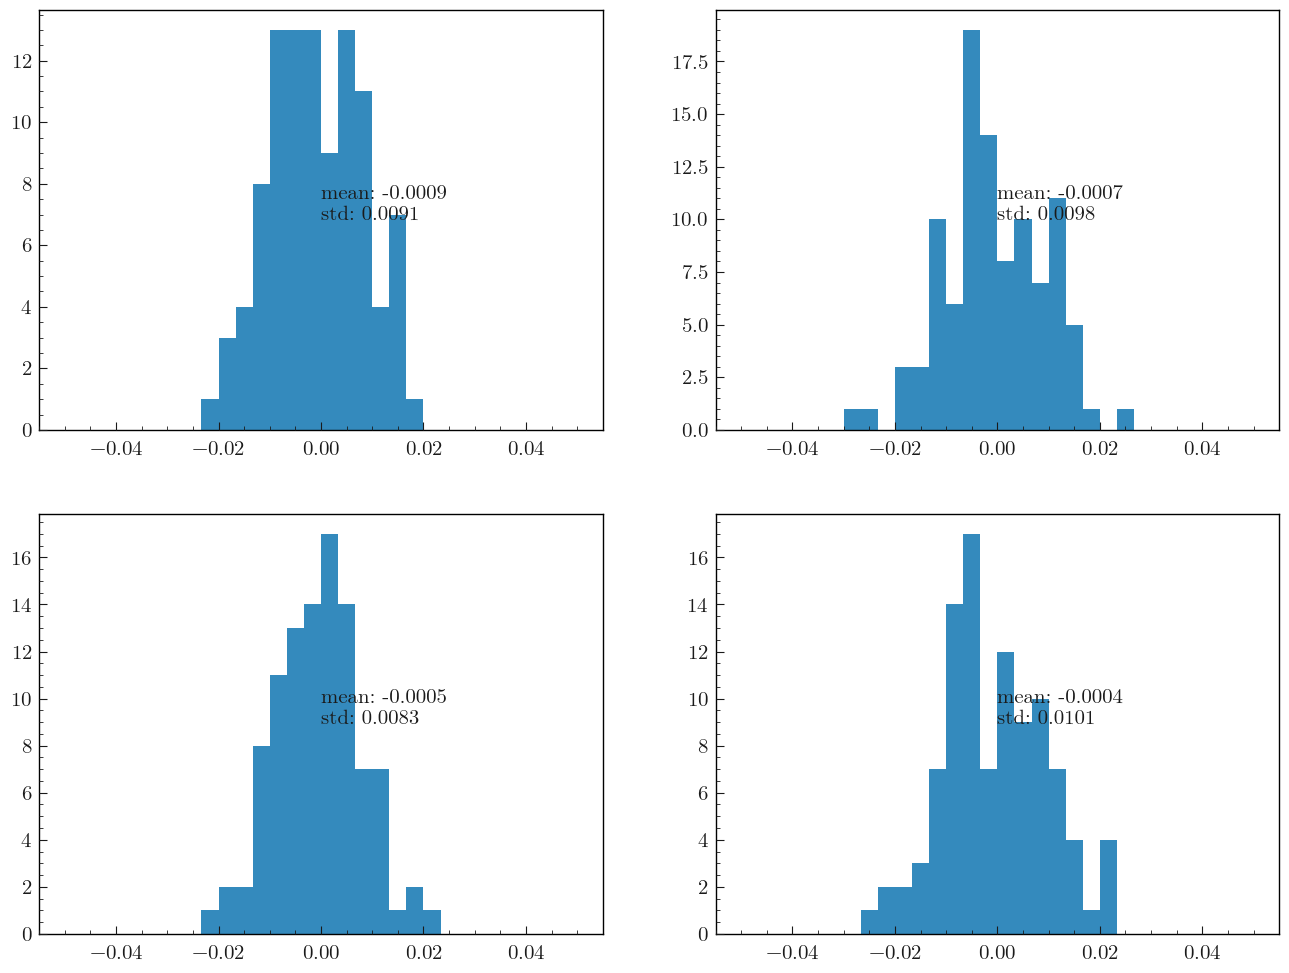

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8*2, 6*2))

ax1.hist(xp_res, bins=30, range=(-0.05, 0.05), label="x+")
ax1.text(0.5, 0.5, f"mean: {np.mean(xp_res):.4f}\nstd: {np.std(xp_res):.4f}", transform=ax1.transAxes)

ax2.hist(yp_res, bins=30, range=(-0.05, 0.05), label="y+")
ax2.text(0.5, 0.5, f"mean: {np.mean(yp_res):.4f}\nstd: {np.std(yp_res):.4f}", transform=ax2.transAxes)

ax3.hist(xm_res, bins=30, range=(-0.05, 0.05), label="x-")
ax3.text(0.5, 0.5, f"mean: {np.mean(xm_res):.4f}\nstd: {np.std(xm_res):.4f}", transform=ax3.transAxes)

ax4.hist(ym_res, bins=30, range=(-0.05, 0.05), label="y-")
ax4.text(0.5, 0.5, f"mean: {np.mean(ym_res):.4f}\nstd: {np.std(ym_res):.4f}", transform=ax4.transAxes)


fig.savefig(f"/dice/users/pc24403/BPGGSZ/sim_fit_frac/ana/pulls/res_{ver}.png")